In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from wordcloud import WordCloud
from string import punctuation
import matplotlib.pyplot as plt
import pandas as pd
import nltk

%matplotlib inline
# nltk.download('all')

### Carregando os dados

In [2]:
dataset = pd.read_csv('data/imdb-reviews.csv')
dataset

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg
...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos


### Funções

<em>Função para criar e testar o modelo</em>

In [3]:
def create_model(df, x, y):
    # Criando a Bag of Words
    vectorizer = CountVectorizer(max_features=150)
    bag_of_words = vectorizer.fit_transform(df[x])
    
    # Separando os dados de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(
        bag_of_words, df[y], test_size=0.33, random_state=42
    )
    
    # Criando e treinando o modelo
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Fazendo teste básico de acurácia
    accuracy = model.score(X_test, y_test)
    print(accuracy)

<em>Função para gerar visualização das WordClouds</em>

In [4]:
def create_wordcloud(df, column):
    all_words = ' '.join([ text for text in df[column] ])
    
    cloud = WordCloud(width=800, height=500, 
                      max_font_size=110, collocations=False).generate(all_words)

    plt.figure(figsize=(16,8))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

### Analisando e tratando os dados

In [5]:
dataset['sentiment'].value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

In [6]:
dataset['_sentiment'] = dataset['sentiment'].apply(lambda x: 1 if x == 'pos' else 0 )
dataset

,id,text_en,text_pt,sentiment,_sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


### Criando Word Clouds
Para visualização das palavras com maior destaque

<strong>Positive Cloud</strong>

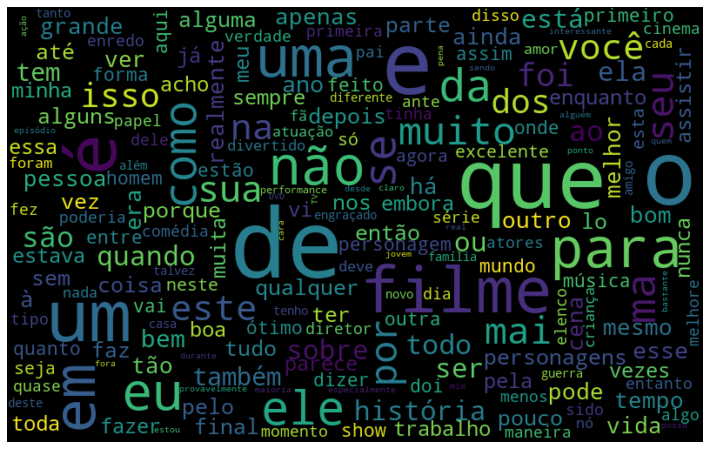

In [7]:
positives = dataset.query('_sentiment == 1')
create_wordcloud(positives, 'text_pt')

<strong>Negative Cloud</strong>

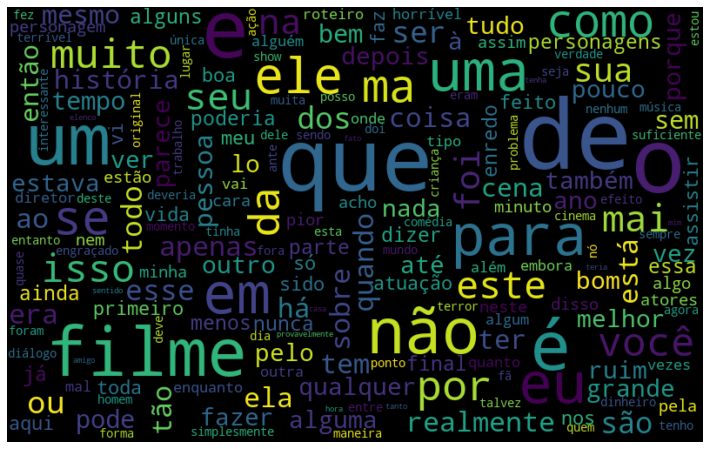

In [8]:
negatives = dataset.query('_sentiment == 0')
create_wordcloud(negatives, 'text_pt')

### Tokenização

In [9]:
# Criando corpus textual com todas as plavras do dataset
all_words = ' '.join([ text for text in dataset['text_pt'] ])

# Criando instância de um WordPunctTokenizer
wpt_tokenizer = nltk.tokenize.WordPunctTokenizer()
word_tokens = wpt_tokenizer.tokenize(all_words)

# Medindo a frequência de cada palavra no corpus
frequency = nltk.FreqDist(word_tokens)

In [10]:
# Criando DataFrame das frequências
frequency_df = pd.DataFrame({'word': frequency.keys(), 'freq': frequency.values()})

In [11]:
# Visualizando palavras com maior frequência
frequency_df.nlargest(columns='freq', n=10)

,word,freq
3,",",611138
6,.,530134
22,de,418565
16,que,330177
44,e,307693
4,o,247255
9,um,217830
101,a,211472
47,é,197337
10,filme,152842


Podemos perceber que <em>as palavras mais frequentes não adicionam muito valor ao texto.</em> 

### Removendo Stop Words e Pontuação

In [12]:
# Importando as Stop Words pelo NLTK
stop_words = nltk.corpus.stopwords.words('portuguese')

# Adicionando pontuações na lista de Stop Words
stop_words += list(punctuation)

dataset['refact_text'] = dataset['text_pt'].apply( 
    lambda text: ' '.join([ word for word in wpt_tokenizer.tokenize(text) if word not in stop_words ]) 
)
dataset.head()

,id,text_en,text_pt,sentiment,_sentiment,refact_text
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,Filmes fotos latão palavra apropriada verdade ...


### Criando modelo

In [13]:
create_model(dataset, 'text_pt', '_sentiment')

0.7379610341869869


In [14]:
create_model(dataset, 'refact_text', '_sentiment')

0.7514397745374342


Removendo as stop words observamos ligeira melhora na performance do modelo